In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,text,label
0,26418.0,Gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,14473.0,@USER Çoook çok bi baklava bi sen zaten,0
2,16107.0,"1) Sn. DÜKEL; Atatürk'ün, Karma E. M. ile başl...",0
3,45908.0,Konfederasyonumuzun Aile ve Sosyal Politikalar...,0
4,12878.0,Hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1


In [4]:
df.drop(columns=["id"], inplace=True)

In [5]:
df.head()

,text,label
0,Gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,@USER Çoook çok bi baklava bi sen zaten,0
2,"1) Sn. DÜKEL; Atatürk'ün, Karma E. M. ile başl...",0
3,Konfederasyonumuzun Aile ve Sosyal Politikalar...,0
4,Hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1


In [6]:
df["label"].value_counts()

label
0    22589
1    19809
Name: count, dtype: int64

In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

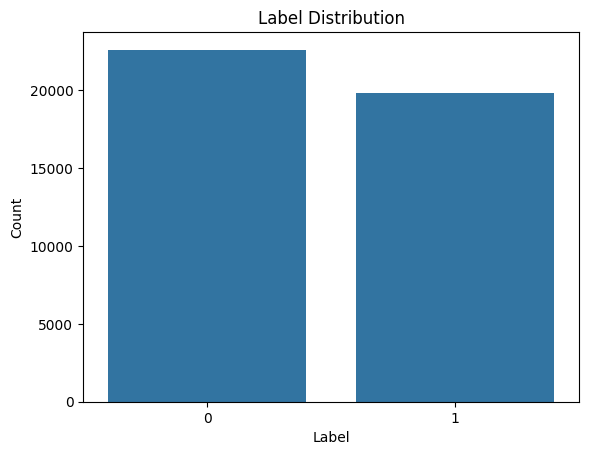

In [8]:
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [9]:
import nltk
import re
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Veli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Veli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Veli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Veli\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
def preprocess(text):
    text = text.lower() # burada texti küçük harfe çeviriyoruz
    text = re.sub(r'[^\w\s]', '', text) # burada noktalama işaretlerini kaldırıyoruz
    text = re.sub(r'\d+', '', text) # burada sayıları kaldırıyoruz
    text = nltk.word_tokenize(text) # burada texti kelimelere ayırıyoruz
    text = [word for word in text if word not in stopwords.words("turkish")] # burada stopwordsleri kaldırıyoruz
    lemma = WordNetLemmatizer() # burada kelime köklerini buluyoruz
    text = [lemma.lemmatize(word) for word in text] # burada kelime köklerini buluyoruz
    text = " ".join(text) # burada kelimeleri birleştiriyoruz
    return text


In [11]:
df["text"] = df["text"].apply(preprocess)

df.head()

,text,label
0,gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,user çoook bi baklava bi sen zaten,0
2,sn dükel atatürkün karma e m başlattığı siyasi...,0
3,konfederasyonumuzun aile sosyal politikalar ba...,0
4,hakemler tarih yazıyorlar kişiye karşı önde ol...,1


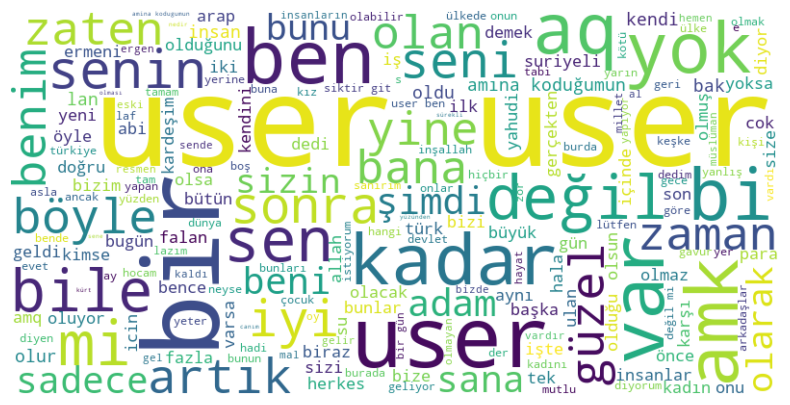

In [12]:
from wordcloud import WordCloud

# Tüm metinleri birleştir
all_text = " ".join(df["text"])

# Kelime bulutu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Kelime bulutunu göster
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
df['text'] = df['text'].str.replace(r'\buser\b', '', regex=True)
df.head()

,text,label
0,gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,çoook bi baklava bi sen zaten,0
2,sn dükel atatürkün karma e m başlattığı siyasi...,0
3,konfederasyonumuzun aile sosyal politikalar ba...,0
4,hakemler tarih yazıyorlar kişiye karşı önde ol...,1


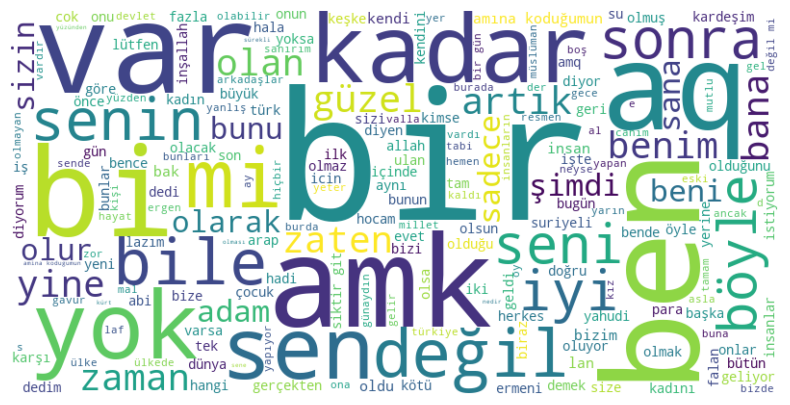

In [14]:
# Tüm metinleri birleştir
all_text = " ".join(df["text"])

# Kelime bulutu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Kelime bulutunu göster
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
df['text'] = df['text'].str.replace(r'\bbi\b', 'bir', regex=True)


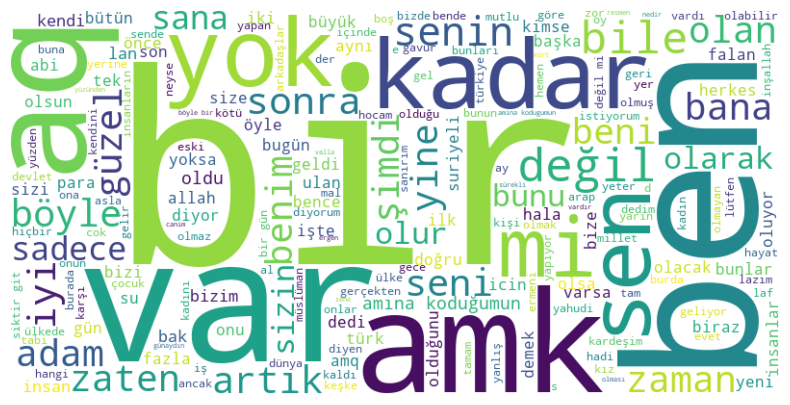

In [16]:
# Tüm metinleri birleştir
all_text = " ".join(df["text"])

# Kelime bulutu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Kelime bulutunu göster
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

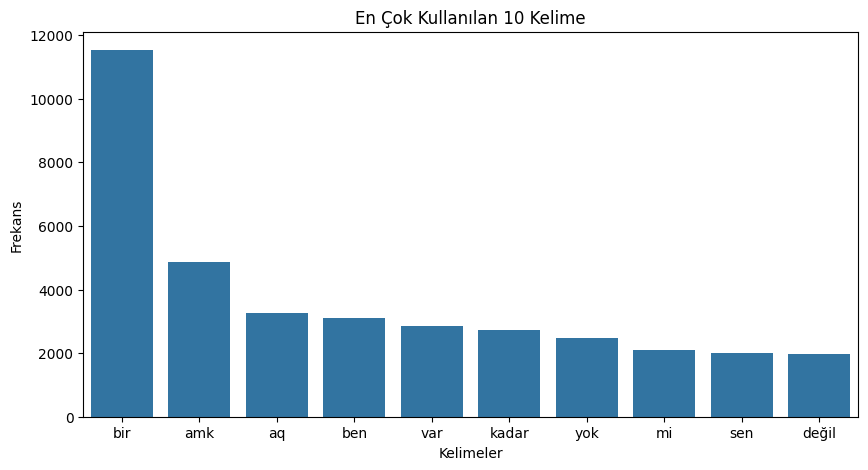

In [17]:
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt

# Tüm metinleri birleştir
all_text = " ".join(df["text"])

# Kelimeleri ayır
words = all_text.split()

# En çok kullanılan 10 kelimeyi bul
most_common_words = Counter(words).most_common(10)

# Kelimeleri ve frekanslarını ayır
words, counts = zip(*most_common_words)

# Countplot oluştur
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('En Çok Kullanılan 10 Kelime')
plt.xlabel('Kelimeler')
plt.ylabel('Frekans')
plt.show()

## Makine Öğrenmesi Modelleri

In [18]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfTransformer

In [19]:
# Özellikler ve etiketler
X = df['text']
y = df['label']

# Veriyi eğitim ve test seti olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol et
print(f"Eğitim seti boyutu: {X_train.shape[0]}")
print(f"Test seti boyutu: {X_test.shape[0]}")

Eğitim seti boyutu: 33918
Test seti boyutu: 8480


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirici oluştur
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Eğitim ve test setlerini TF-IDF vektörlerine dönüştür
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Eğitim ve test setlerinin boyutlarını kontrol et
print(f"TF-IDF Eğitim seti boyutu: {X_train_tfidf.shape}")
print(f"TF-IDF Test seti boyutu: {X_test_tfidf.shape}")

TF-IDF Eğitim seti boyutu: (33918, 5000)
TF-IDF Test seti boyutu: (8480, 5000)


In [21]:
# Makine öğrenmesi modellerini bir dictionary içine yazdır
models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "MultinomialNB": MultinomialNB(),
    # "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    # "DecisionTreeClassifier": DecisionTreeClassifier(),
    # "RandomForestClassifier": RandomForestClassifier()
}

# Dictionary'i yazdır
print(models)

{'GaussianNB': GaussianNB(), 'BernoulliNB': BernoulliNB(), 'MultinomialNB': MultinomialNB(), 'LogisticRegression': LogisticRegression(), 'KNeighborsClassifier': KNeighborsClassifier()}


In [22]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

In [23]:
results = []

In [24]:
import time
from time import time

X_train_tfidf_dense = X_train_tfidf.toarray()

for name, model in models.items():
    start_time = time()
    scores = cross_validate(model, X_train_tfidf_dense, y_train, cv=5, scoring=scoring)
    end_time = time()

    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_weighted'].mean()
    recall = scores['test_recall_weighted'].mean()
    f1 = scores['test_f1_weighted'].mean()
    roc_auc = scores['test_roc_auc'].mean()
    elapsed_time = end_time - start_time

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC_AUC": roc_auc,
        "Time": elapsed_time
    })

    print(f"{name} modeli için {elapsed_time:.2f} saniye sürdü.")

GaussianNB modeli için 21.03 saniye sürdü.
BernoulliNB modeli için 9.61 saniye sürdü.
MultinomialNB modeli için 4.44 saniye sürdü.
LogisticRegression modeli için 25.50 saniye sürdü.
KNeighborsClassifier modeli için 100.52 saniye sürdü.


In [25]:
results

[{'Model': 'GaussianNB',
  'Accuracy': np.float64(0.8577450102434222),
  'Precision': np.float64(0.8641415824021099),
  'Recall': np.float64(0.8577450102434222),
  'F1': np.float64(0.8562651630423261),
  'ROC_AUC': np.float64(0.8603162806685223),
  'Time': 21.03288984298706},
 {'Model': 'BernoulliNB',
  'Accuracy': np.float64(0.8913555957387921),
  'Precision': np.float64(0.8949079144051106),
  'Recall': np.float64(0.8913555957387921),
  'F1': np.float64(0.8906686812770935),
  'ROC_AUC': np.float64(0.9409374399353112),
  'Time': 9.606838464736938},
 {'Model': 'MultinomialNB',
  'Accuracy': np.float64(0.8753462370549014),
  'Precision': np.float64(0.8782754550368443),
  'Recall': np.float64(0.8753462370549014),
  'F1': np.float64(0.8746079137025266),
  'ROC_AUC': np.float64(0.931152494428372),
  'Time': 4.44380259513855},
 {'Model': 'LogisticRegression',
  'Accuracy': np.float64(0.8840437621175582),
  'Precision': np.float64(0.894855423399399),
  'Recall': np.float64(0.8840437621175582)

In [27]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

In [28]:
results_df

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,Time
1,BernoulliNB,0.891356,0.894908,0.891356,0.890669,0.940937,9.606838
3,LogisticRegression,0.884044,0.894855,0.884044,0.882446,0.938424,25.497766
2,MultinomialNB,0.875346,0.878275,0.875346,0.874608,0.931152,4.443803
0,GaussianNB,0.857745,0.864142,0.857745,0.856265,0.860316,21.032890
4,KNeighborsClassifier,0.600507,0.737614,0.600507,0.511203,0.626473,100.519328


C:\Users\Veli\AppData\Local\Temp\ipykernel_20204\1958724997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


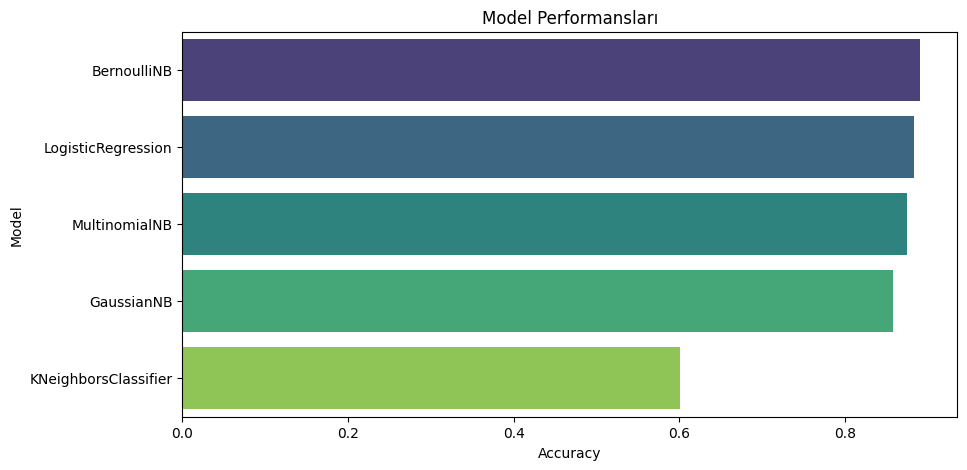

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Performansları')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

C:\Users\Veli\AppData\Local\Temp\ipykernel_20204\814729821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Model', data=results_df, palette='viridis')


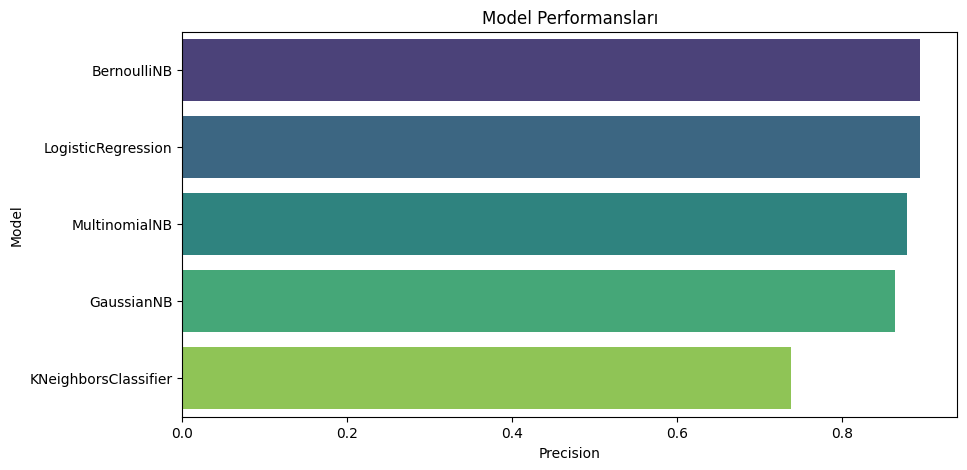

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Model Performansları')
sns.barplot(x='Precision', y='Model', data=results_df, palette='viridis')
plt.show()

C:\Users\Veli\AppData\Local\Temp\ipykernel_20204\2510685030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=results_df, palette='viridis')


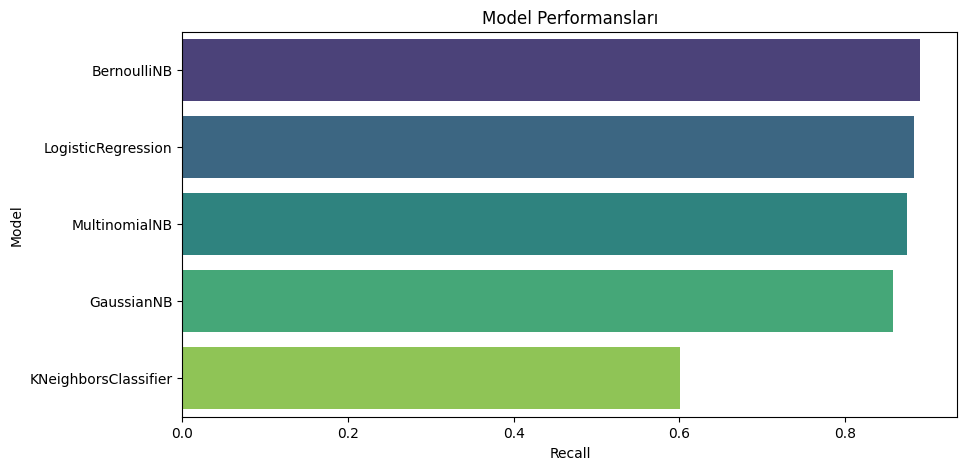

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Model Performansları')   
sns.barplot(x='Recall', y='Model', data=results_df, palette='viridis')
plt.show()

C:\Users\Veli\AppData\Local\Temp\ipykernel_20204\3580331139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1', y='Model', data=results_df, palette='viridis')


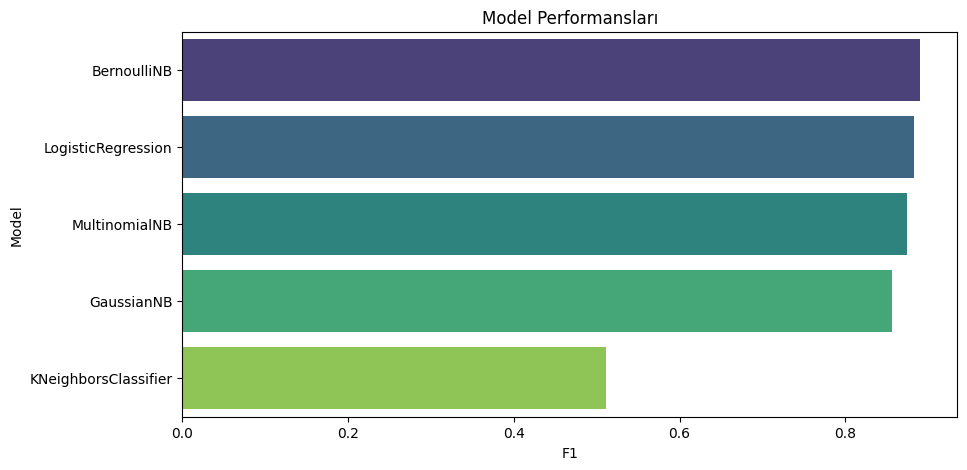

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Model Performansları')
sns.barplot(x='F1', y='Model', data=results_df, palette='viridis')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# BernoulliNB modelini yeniden eğit
bernoulli_nb = BernoulliNB()

# Modeli eğit
bernoulli_nb.fit(X_train_tfidf, y_train)

# Test seti üzerinde tahmin yap
y_pred = bernoulli_nb.predict(X_test_tfidf)

# Modelin performansını değerlendirmek için metrikleri hesapla
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, bernoulli_nb.predict_proba(X_test_tfidf)[:, 1])

# Sonuçları yazdır
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8976
Precision: 0.9017
Recall: 0.8976
F1 Score: 0.8970
ROC AUC: 0.9438


In [37]:
def plot_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)

    fig = plt.figure(figsize=(10, 10))
    plt.matshow(conf_mat, cmap='Blues', fignum=1)
    plt.yticks(range(2), ['0', '1'])
    plt.xticks(range(2), ['0', '1'])
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), va='center', ha='center')

0.9037510844367735 : Precision
0.8943627727909945 : Recall
0.8964170100228657 : F1


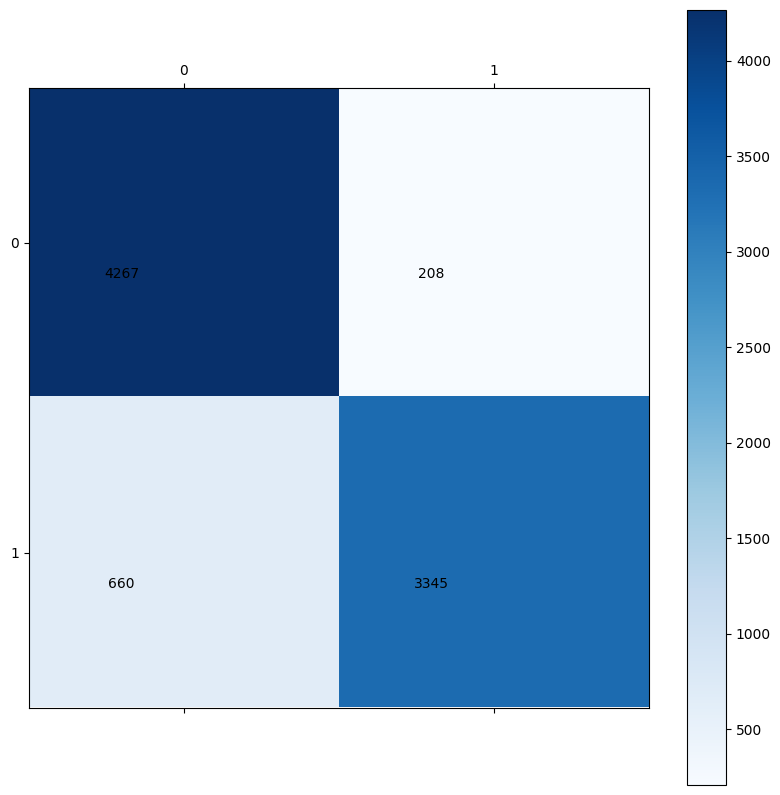

In [38]:
y_pred = bernoulli_nb.predict(X_test_tfidf)
print(precision_score(y_test, y_pred, average='macro'), ": Precision")
print(recall_score(y_test, y_pred, average='macro'), ": Recall")
print(f1_score(y_test, y_pred, average='macro'), ": F1")

plot_confusion_matrix(y_test, y_pred)